In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import ARIMA

In [2]:
df=pd.read_csv(r"C:\Users\ABHIMANYUU\OneDrive\Desktop\AirPassengers (2).csv")

In [3]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [5]:
df.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [6]:
df['Month']=pd.to_datetime(df['Month'])
df.index=df['Month']
del df ['Month']

In [7]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Month'>

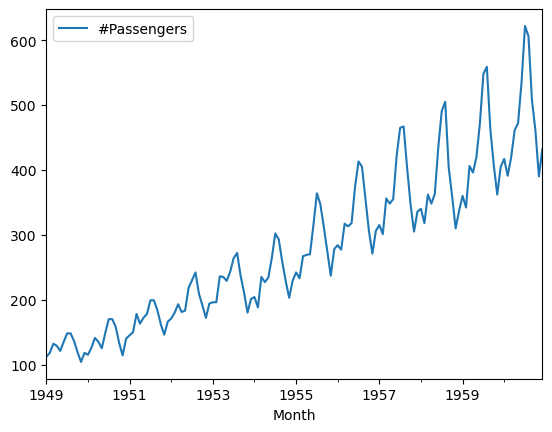

In [8]:
#plotting the TimeSeries data
df.plot()

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation plot')

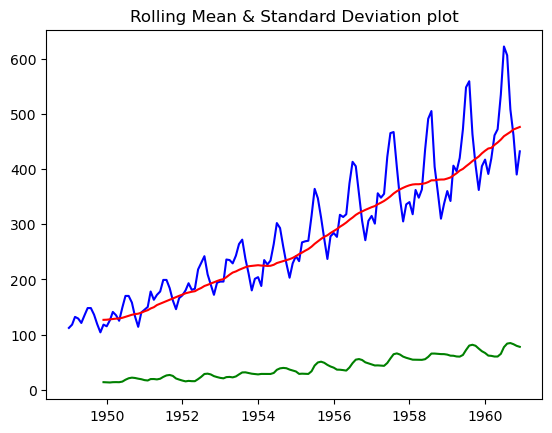

In [9]:
mean_log=df.rolling(window=12).mean()
std_log=df.rolling(window=12).std()

plt.plot(df,color='blue',label='Original')

plt.plot(mean_log,color='red',label='Rolling Mean')

plt.plot(std_log,color='green',label='Rolling Std')

plt.title('Rolling Mean & Standard Deviation plot')

In [10]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(df['#Passengers'])
result

(0.8153688792060488,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

Why use logarithmic computation to make time series data stationary?

1. Smoothing Out Jumps:

Sometimes, data might have big jumps or changes at different points. The logarithm helps smooth out these jumps, making the data easier to understand.

2. Handling Big Numbers:

If the numbers in your data are really big, taking the logarithm can make them more manageable. It's like using a smaller scale to look at the same information.

3. Making Trends Easier to See:

If your data is showing a trend that's going up or down really fast, the logarithm can make that trend look more like a straight line. This makes it easier to analyze and understand.

4. Keeping Things Proportional:

Sometimes, it's not just the size of the change that matters, but how much of a change it is compared to the whole. Logarithms help highlight these proportional changes.

5. Getting Ready for Analysis:

Many mathematical tools work better with data that doesn't change too much over time. Taking the logarithm helps get the data ready for these tools, making the analysis more accurate.

6. Making the Data Play Nice:

Imagine your data is like music notes. Logarithms can help make these notes play in a more consistent and predictable way, making it easier to create a melody (or analyze the data).
So, in simple terms, using logarithmic computation is like putting on glasses to see your data more clearly. It helps smooth things out, manage big numbers, and make trends easier to understand. It's a handy trick to get your data ready for analysis and modeling.

<AxesSubplot:xlabel='Month'>

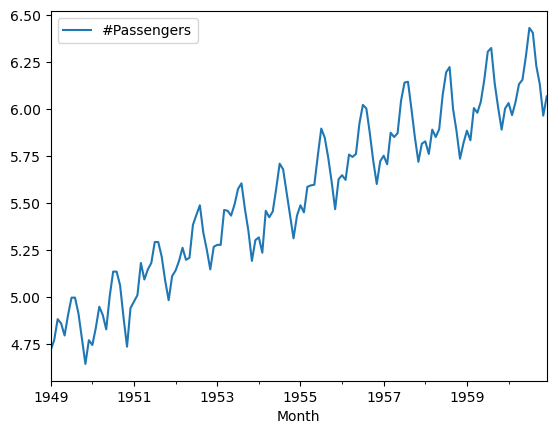

In [11]:
# logarithmic computation to make the time series data stationary
first_log=np.log(df)
first_log=first_log.dropna()
first_log.plot()

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation plot')

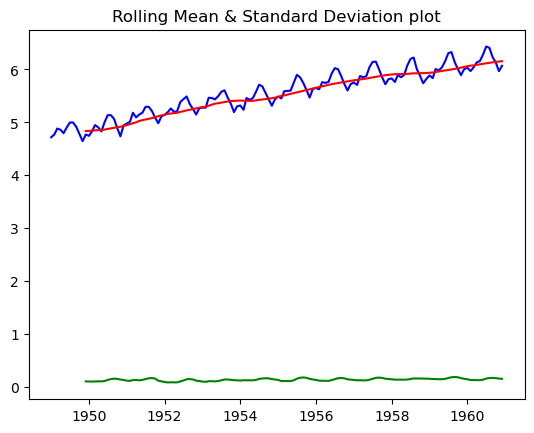

In [12]:
mean_log=first_log.rolling(window=12).mean()
std_log=first_log.rolling(window=12).std()

plt.plot(first_log,color='blue',label='Original')

plt.plot(mean_log,color='red',label='Rolling Mean')

plt.plot(std_log,color='green',label='Rolling Std')

plt.title('Rolling Mean & Standard Deviation plot')

In [13]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(first_log['#Passengers'])
result

(-1.7170170891069598,
 0.4223667747703916,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 -445.3990312497209)

<AxesSubplot:xlabel='Month'>

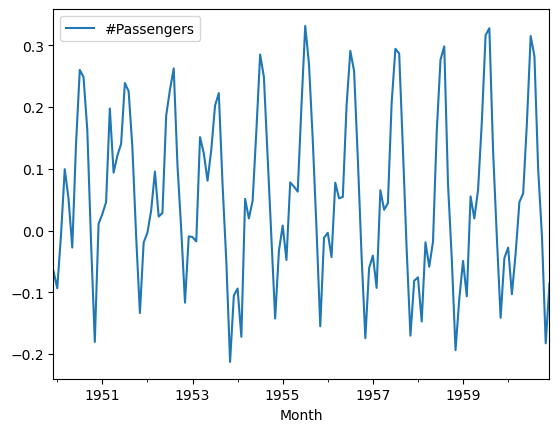

In [14]:
new_df= first_log - mean_log
new_df=new_df.dropna()
new_df.plot()

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation plot')

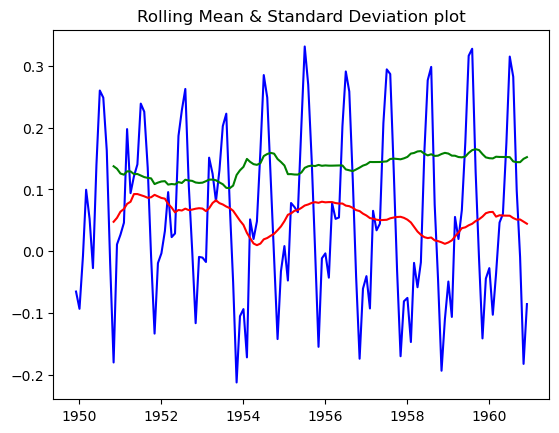

In [15]:
mean_log=new_df.rolling(window=12).mean()
std_log=new_df.rolling(window=12).std()

plt.plot(new_df,color='blue',label='Original')

plt.plot(mean_log,color='red',label='Rolling Mean')

plt.plot(std_log,color='green',label='Rolling Std')

plt.title('Rolling Mean & Standard Deviation plot')

In [16]:
result=adfuller(new_df['#Passengers'])
result

(-3.162907991300866,
 0.022234630001243334,
 13,
 119,
 {'1%': -3.4865346059036564,
  '5%': -2.8861509858476264,
  '10%': -2.579896092790057},
 -436.63269481747034)

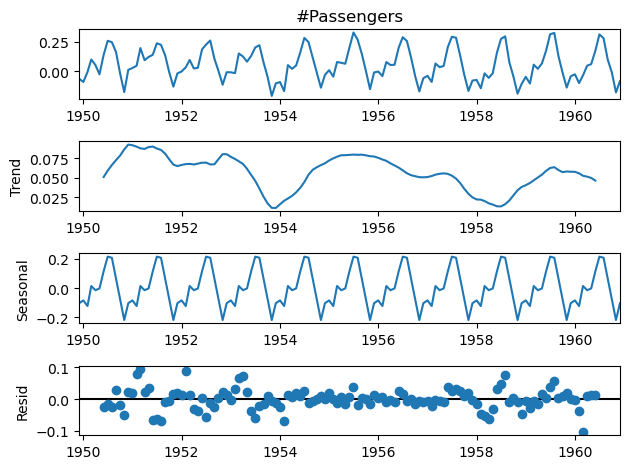

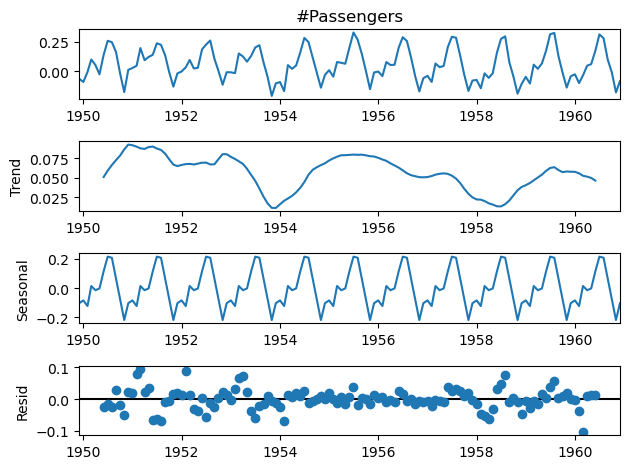

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result=seasonal_decompose(new_df['#Passengers'].dropna())
decompose_result.plot()

In [1]:
#p- past data (AR-Auto Regression) / measures the correlation between a time
#d- differencing (I - Integration) /will be number of time we taken difference
#q- error (MA - Moving Average) / identify the direct relationship between observatoions at different lags while removing the indirect effects of shorter lags

#p -autocorrelation (acf)
#q -partial autocorrelation(pacf)




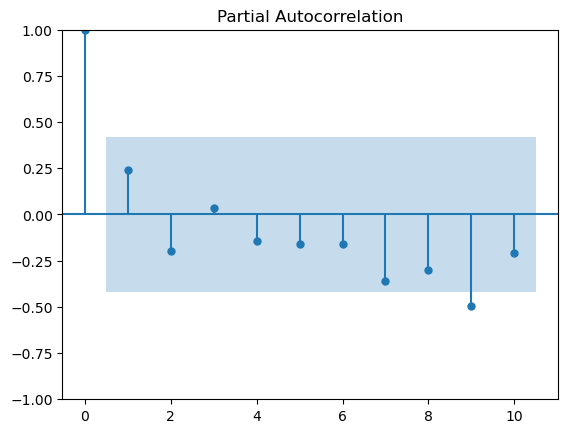

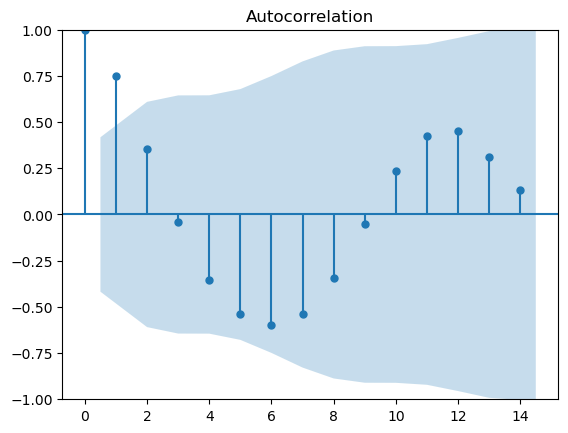

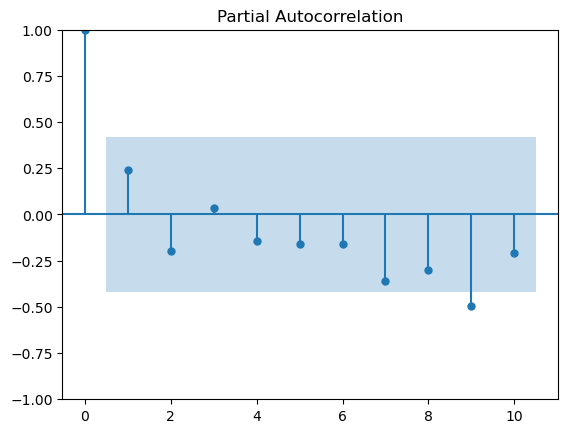

In [27]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming 'new_df' is your time series data
acf_plot = acf(new_df)
pacf_plot = pacf(new_df)

# Plot autocorrelation function (acf)
plot_acf(acf_plot)

# Limit the number of lags for partial autocorrelation function (pacf)
max_lags_for_pacf = min(len(new_df) // 2 - 1, 10)  # Limit to 50% of sample size or 10, whichever is smaller
plot_pacf(pacf_plot, lags=max_lags_for_pacf)


In [28]:
#Arima Model

In [29]:
train=new_df.iloc[:120]['#Passengers']
test=new_df.iloc[121:]['#Passengers']

In [31]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

model= SARIMAX(train, order=(1,0,2), seasonal_order=(1,0,2,12))
model=model.fit()

C:\Users\ABHIMANYUU\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ABHIMANYUU\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ABHIMANYUU\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\ABHIMANYUU\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:xlabel='Month'>

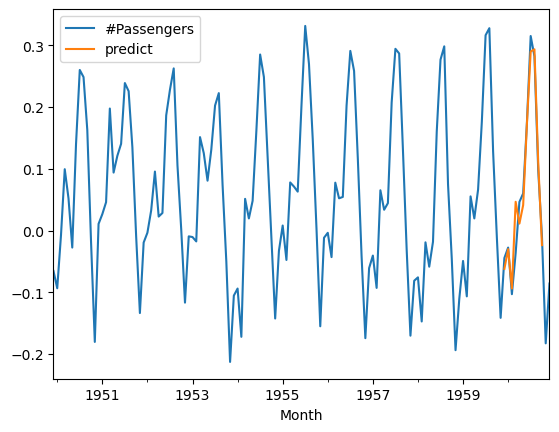

In [32]:
new_df['predict']=model.predict(start=len(train),end=len(train)-1+len(test)-1,dynamic=True)
new_df[['#Passengers','predict']].plot()

<AxesSubplot:xlabel='Month'>

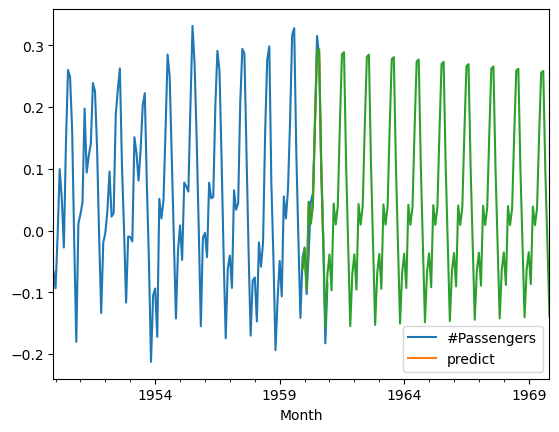

In [33]:
forecast= model.forecast(steps=120)
new_df.plot()
forecast.plot()